In [23]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
business_df = pd.read_json("yelp_academic_dataset_business.json", lines=True)
business_df
business_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [22]:
business=business_df.dropna()
business.describe()
pd.DataFrame(business)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montr茅al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA
10,4568 Highway 7 E,"{'GoodForKids': 'True', 'NoiseLevel': 'loud', ...",KapTdGyGs7RK0c68Z6hhhg,"Restaurants, Japanese",Markham,"{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",0,43.862484,-79.306960,Sushi 8,Unionville,L3R 1M5,12,1.5,ON
11,595 Markham Street,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",tZnSodhPwNr4bzrwJ1CSbw,"Cajun/Creole, Southern, Restaurants",Toronto,"{'Tuesday': '17:0-1:0', 'Wednesday': '17:0-1:0...",0,43.664125,-79.411886,Southern Accent Restaurant,Palmerston,M6G 2L7,146,4.0,ON
12,2801 N 15th Ave,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",_c3ixq9jYKxhLUB0czi0ug,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,33.479807,-112.091188,Original Hamburger Works,,85007,277,4.0,AZ


In [13]:
business['attributes']

0         {'BikeParking': 'False', 'BusinessAcceptsCredi...
1         {'Alcohol': 'none', 'BikeParking': 'False', 'B...
2         {'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...
4                    {'BusinessAcceptsCreditCards': 'True'}
5         {'BikeParking': 'True', 'BusinessAcceptsCredit...
8         {'Alcohol': 'none', 'Ambience': '{'romantic': ...
9         {'BikeParking': 'True', 'BusinessAcceptsCredit...
10        {'GoodForKids': 'True', 'NoiseLevel': 'loud', ...
11        {'Alcohol': 'full_bar', 'Ambience': '{'romanti...
12        {'Alcohol': 'full_bar', 'Ambience': '{'romanti...
14        {'BusinessParking': '{'garage': False, 'street...
16        {'Alcohol': 'full_bar', 'BikeParking': 'True',...
19        {'BikeParking': 'True', 'BusinessAcceptsCredit...
23        {'BikeParking': 'True', 'BusinessAcceptsCredit...
25        {'GoodForKids': 'True', 'RestaurantsGoodForGro...
26        {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
29        {'BusinessAcceptsCreditCards':

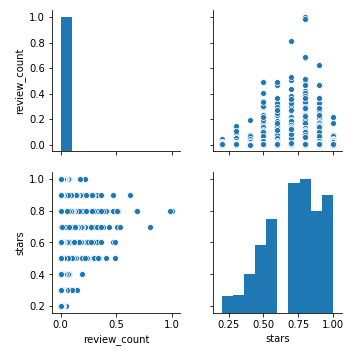

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


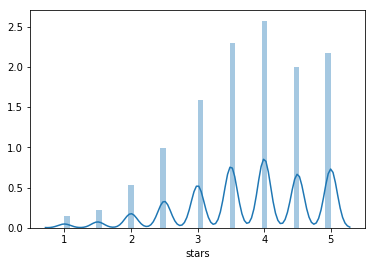

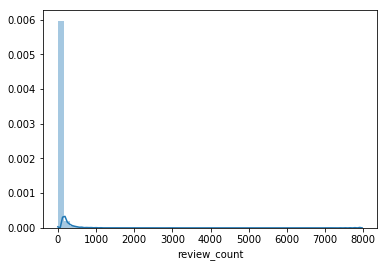

In [4]:
review_stars = business_df.loc[:, ['review_count', 'stars']]
review_stars_standardized = (review_stars)/review_stars.max()
ax = sns.pairplot(review_stars_standardized)
plt.show()
ax = sns.distplot(business['stars'])
plt.show()
ax = sns.distplot(business['review_count'])
plt.show()

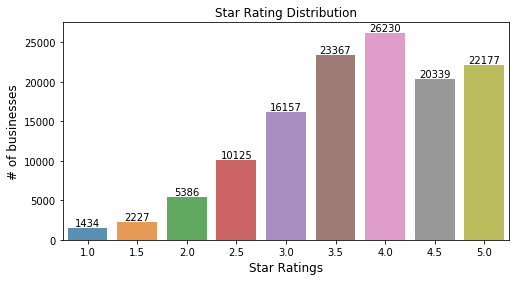

In [14]:
x=business['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()